# Data Imbalance Handling by OverSampling, UnderSampling, Both Sampling and SMOTE with Random Forest Classifier
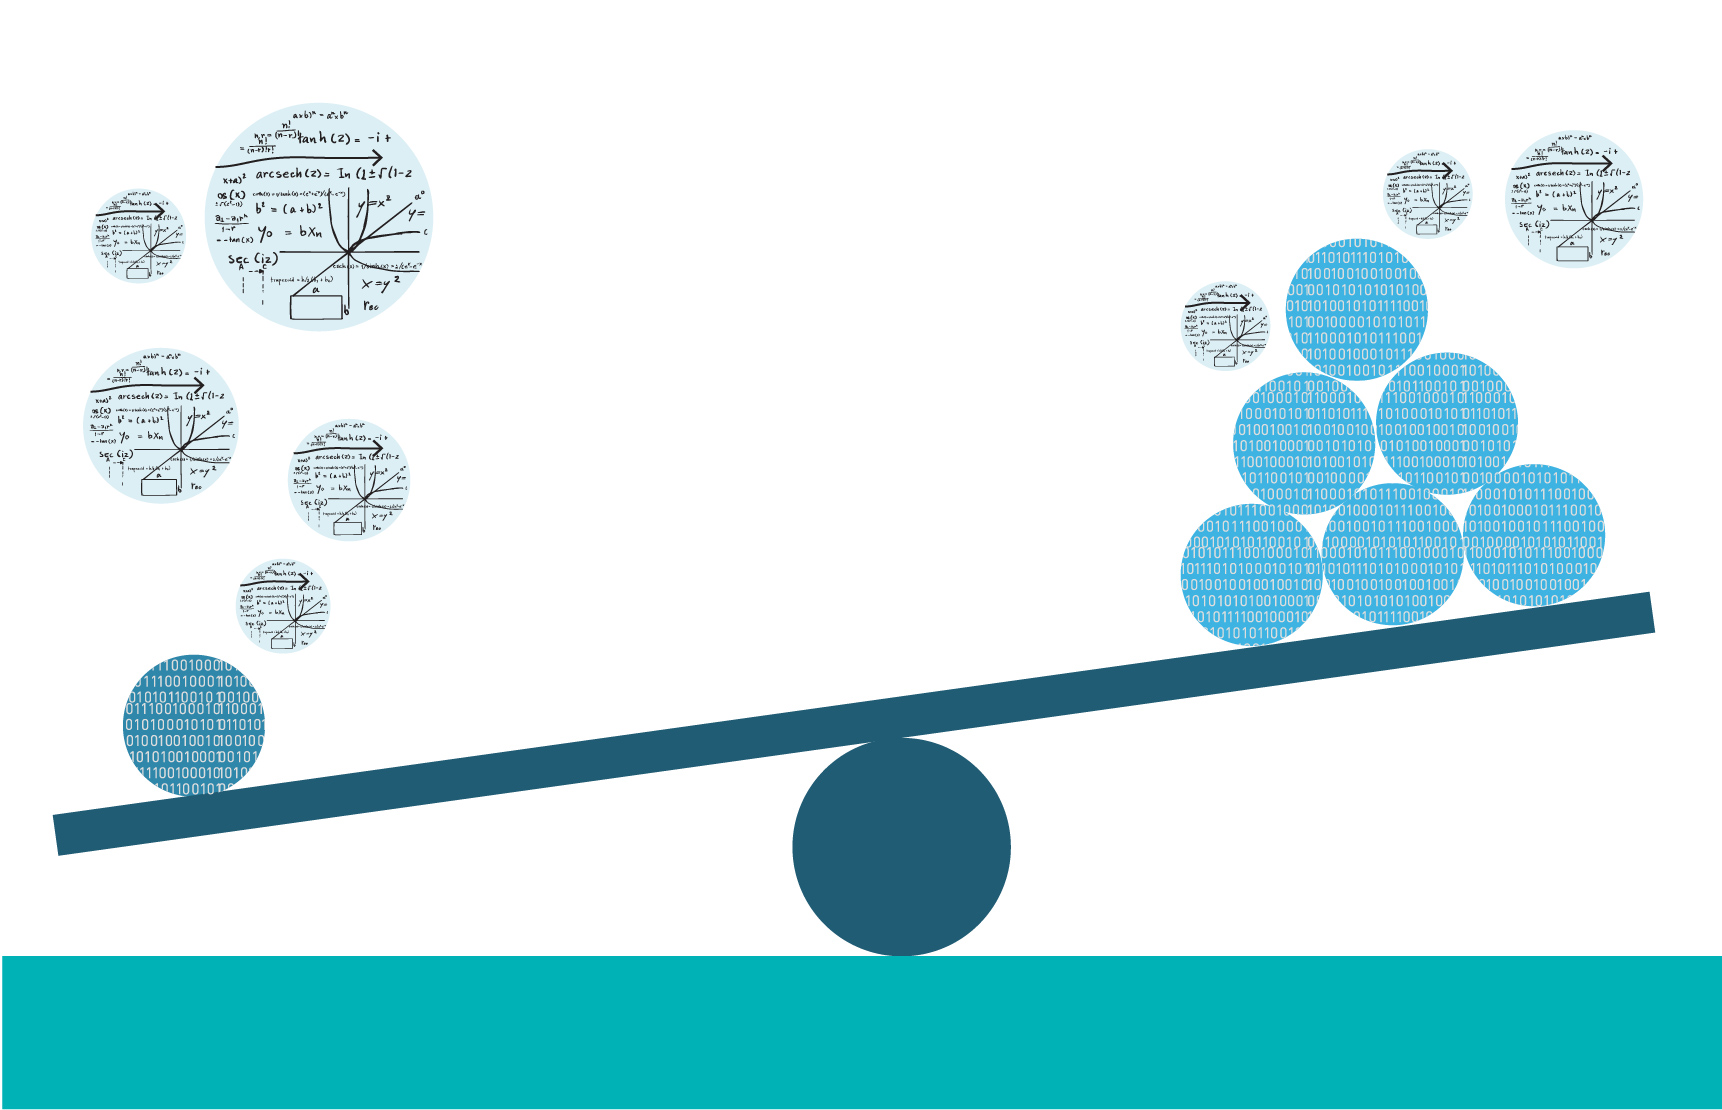

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Reading Dataset

In [2]:
df = pd.read_csv("aug_train.csv")
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
df.shape

(382154, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
df.describe()

id            Age  Driving_License    Region_Code  \
count  382154.000000  382154.000000    382154.000000  382154.000000   
mean   234392.953477      38.545691         0.998108      26.406867   
std    139527.487326      15.226897         0.043455      13.181241   
min         1.000000      20.000000         0.000000       0.000000   
25%    115006.250000      25.000000         1.000000      15.000000   
50%    230461.500000      36.000000         1.000000      28.000000   
75%    345434.750000      49.000000         1.000000      35.000000   
max    508145.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       382154.000000   382154.000000         382154.000000   
mean             0.489182    30711.271362            111.939812   
std              0.499884    17061.595532             54.286511   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24546.000000             26.000000   
50%              0.000000    31692.000000            145.000000   
75%              1.000000    39447.750000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  382154.000000  382154.000000  
mean      154.189429       0.163811  
std        83.735107       0.370104  
min        10.000000       0.000000  
25%        81.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

# Looking for missing Values

<AxesSubplot:>

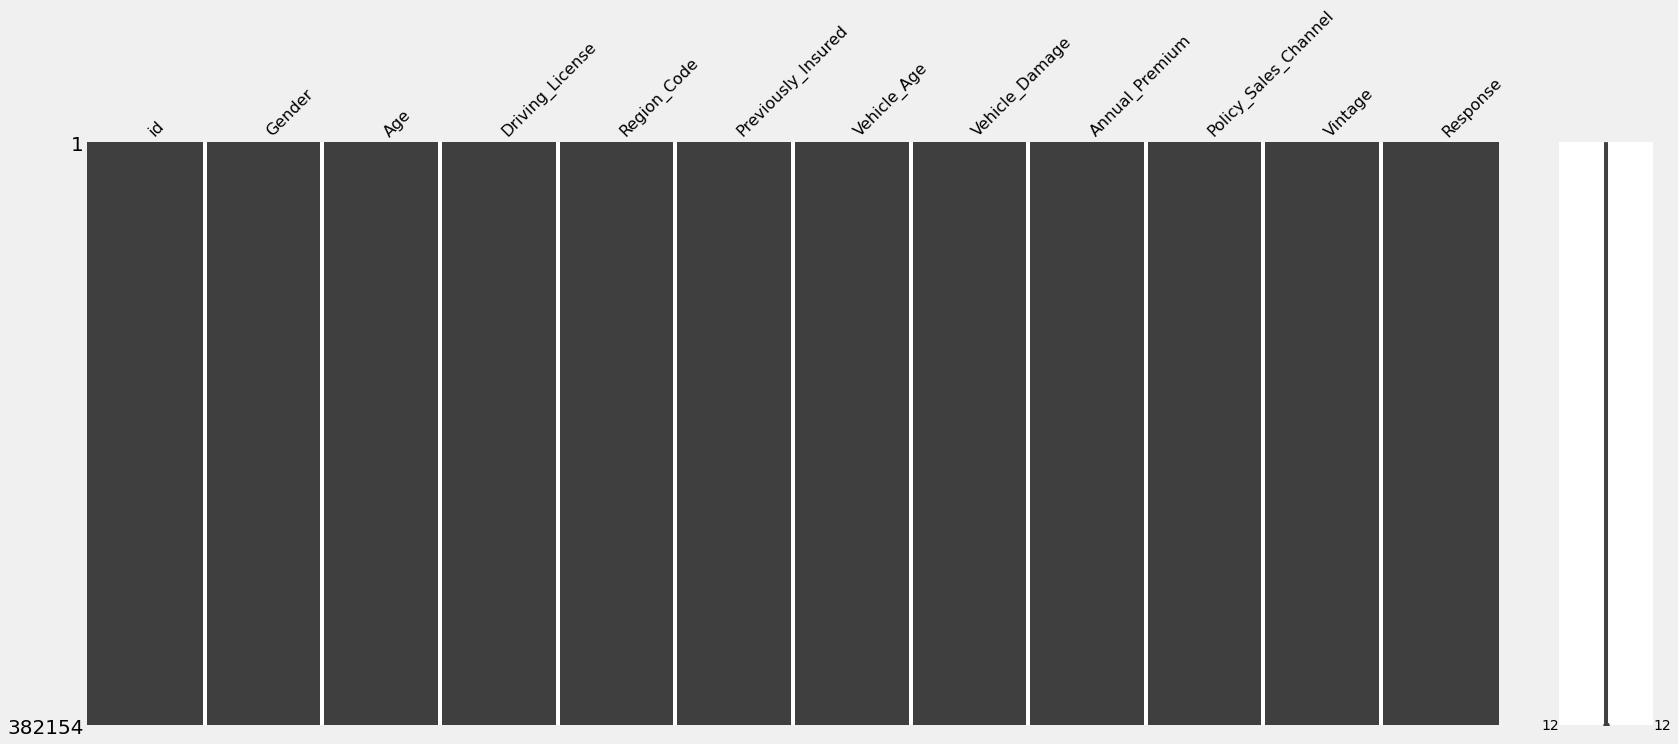

In [6]:
import missingno as m
m.matrix(df)

## No missing Values

In [7]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0  
4         0

# Data Preprocessing

In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df.Driving_License.unique()

array([1, 0], dtype=int64)

In [10]:
df.Region_Code.unique()

array([ 7., 28., 33., 46., 25.,  8., 41., 39., 13., 14., 36.,  3., 43.,
       45., 48., 11., 30., 15.,  6., 50., 38., 19., 34., 22., 29., 35.,
       12., 37.,  4., 10., 40., 24., 31., 21.,  2., 52.,  9., 49.,  5.,
       47.,  1., 20., 42., 27., 26., 32., 18., 16., 17., 51.,  0., 23.,
       44.])

In [11]:
df.Previously_Insured.unique()

array([1, 0], dtype=int64)

In [12]:
df.Vehicle_Age.unique()  

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [13]:
df.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

# Labelling the Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])


# Dropping the ID and Region_Code Column

In [15]:
df = df.drop(columns=['Region_Code','id'])

# Heatmap

<AxesSubplot:>

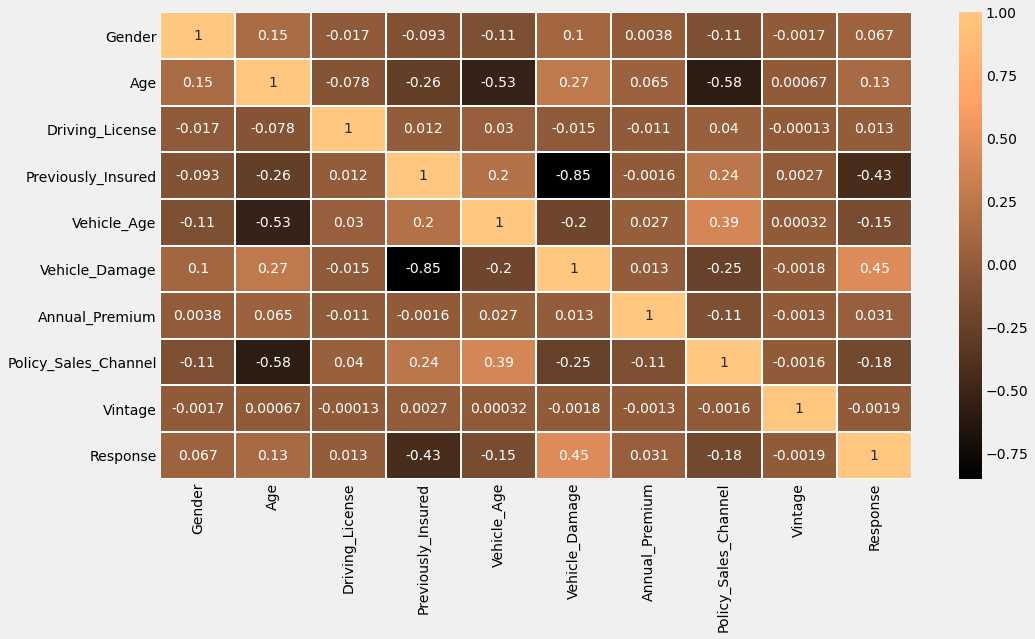

In [16]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, linewidth =1, cmap='copper')

In [17]:
df.head()

Gender  Age  Driving_License  Previously_Insured  Vehicle_Age  \
0       1   22                1                   1            1   
1       1   42                1                   0            0   
2       0   66                1                   0            0   
3       0   22                1                   0            1   
4       1   28                1                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               0          2630.0                 152.0       16         0  
1               1         43327.0                  26.0      135         0  
2               1         35841.0                 124.0      253         0  
3               0         27645.0                 152.0       69         0  
4               0         29023.0                 152.0      211         0

# Data Imbalance

In [18]:
df.Response.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

## The number of label 0s are way more than label 1

<AxesSubplot:xlabel='Response', ylabel='count'>

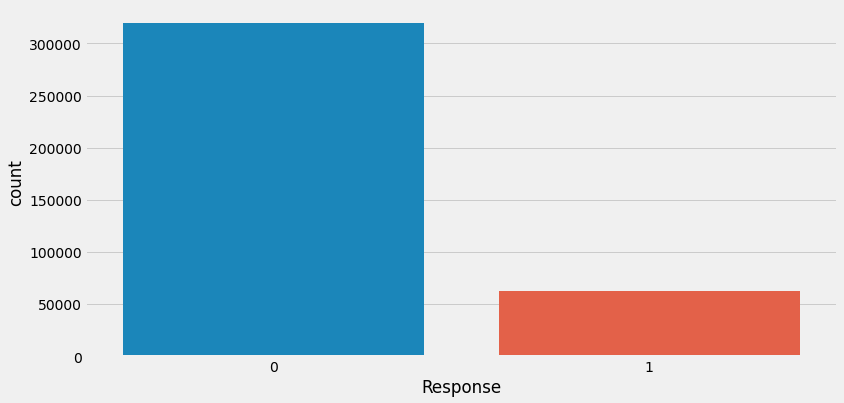

In [19]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Response', data=df)

In [20]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response'],
      dtype='object')

# X and y Split

In [21]:
X= df[['Gender', 'Age', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y= df['Response']

In [22]:
X.shape,y.shape

((382154, 9), (382154,))

## There are many ways to fix this Data Imbalance problem, I have taken 4 ways here

* **Random Over Sampling**
* **Random Under Sampling**
* **SMOTE**
* **Both Over and Under Sampling**

# Random Over Sampling

In [23]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [24]:
X_over, y_over = oversample.fit_resample(X, y)

# Before Over Sampling

In [25]:
y.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

# After Over Sampling

In [26]:
y_over.value_counts()

1    319553
0    319553
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

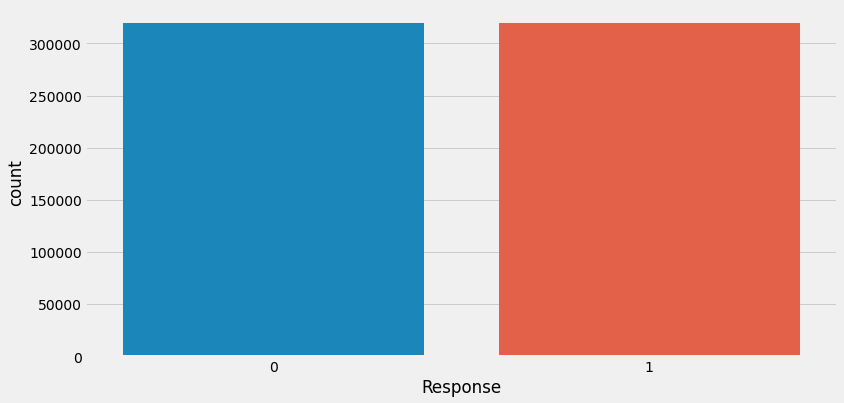

In [27]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_over)

## The Label Values are Equal Now

# Random Under Sampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [29]:
X_under, y_under = undersample.fit_resample(X, y)

# Before Under Sampling

In [30]:
y.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

# After Under Sampling

In [31]:
y_under.value_counts()

1    62601
0    62601
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

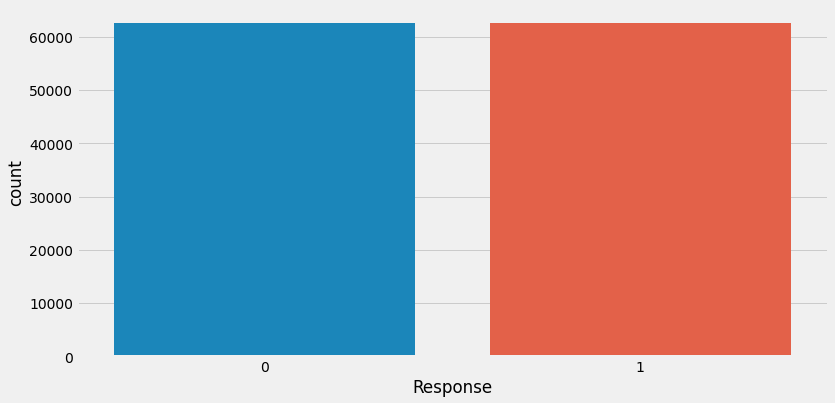

In [32]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_under)

## The Label Values are Equal Now

# SMOTE - Synthetic Minority Over Sampling Technique

Its also a oversampling technique but it does not do oversampling randomly like random oversampler

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)

# Before SMOTE

In [34]:
y.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

# After SMOTE

In [35]:
y_smote.value_counts()

1    319553
0    319553
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

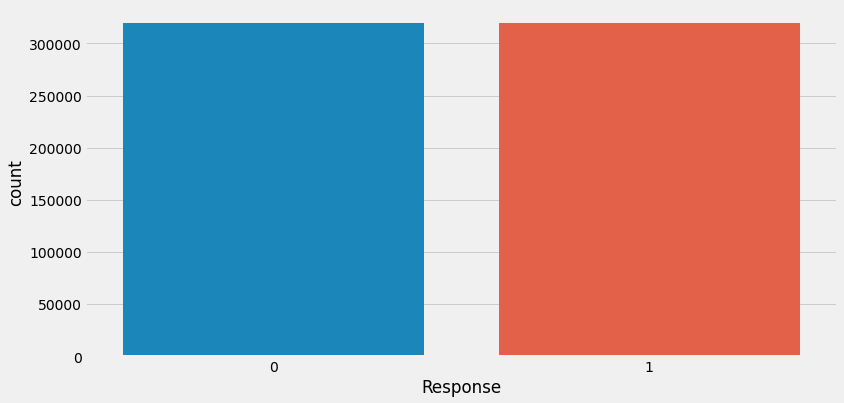

In [36]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_smote)

## The Label Values are Equal Now

# Both Over and Under Sampling

In [37]:
over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)

In [38]:
X_both, y_both = over.fit_resample(X, y)

# Before Sampling

In [39]:
y.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

# After Both Sampling

In [40]:
y_both.value_counts()

0    319553
1     63910
Name: Response, dtype: int64

In [41]:
X_both, y_both = under.fit_resample(X_both, y_both)

In [42]:
y_both.value_counts()

0    127820
1     63910
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

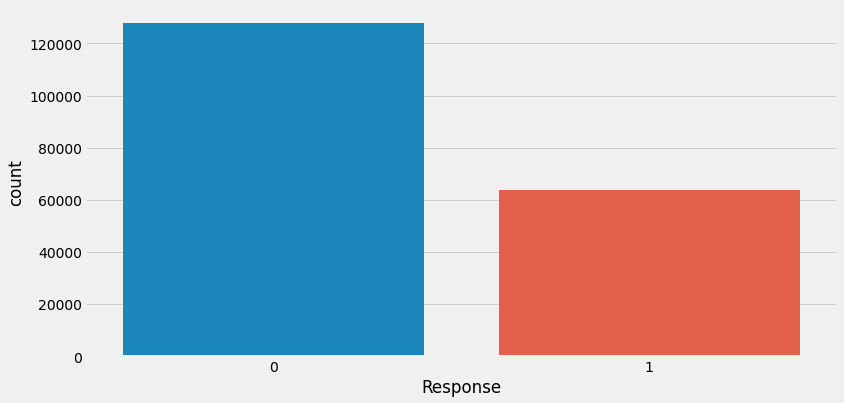

In [43]:
plt.subplots(figsize=(12,6))
sns.countplot(x=y_both)

## The 1 label increased. The combination of over sampling and undersampling can be very effective with different sampling_strategy

# Train Test Split for all the Cases

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.25, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.25, random_state = 0)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0)
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_both, y_both, test_size = 0.25, random_state = 0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((286615, 9), (95539, 9), (286615,), (95539,))

In [46]:
X_train_over.shape, X_test_over.shape, y_train_over.shape, y_test_over.shape

((479329, 9), (159777, 9), (479329,), (159777,))

In [47]:
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

((93901, 9), (31301, 9), (93901,), (31301,))

In [48]:
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((479329, 9), (159777, 9), (479329,), (159777,))

In [49]:
X_train_both.shape, X_test_both.shape, y_train_both.shape, y_test_both.shape

((143797, 9), (47933, 9), (143797,), (47933,))

# Building Random Forest Classifier for all the Cases

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

rfc_over = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_over.fit(X_train_over, y_train_over)

rfc_under = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_under.fit(X_train_under, y_train_under)

rfc_smote = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_smote.fit(X_train_smote, y_train_smote)

rfc_both = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_both.fit(X_train_both, y_train_both)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Prediction of Test Set for all the Cases

In [51]:
y_pred = rfc.predict(X_test)
y_pred_over = rfc_over.predict(X_test_over)
y_pred_under = rfc_under.predict(X_test_under)
y_pred_smote = rfc_smote.predict(X_test_smote)
y_pred_both = rfc_smote.predict(X_test_both)

In [52]:
y_test=y_test.values
y_test_over=y_test_over.values
y_test_under=y_test_under.values
y_test_smote=y_test_smote.values
y_test_both=y_test_both.values

# Predicted Value and Actual Value for all the Cases

In [53]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [54]:
print(np.concatenate((y_pred_over.reshape(len(y_pred_over),1), y_test_over.reshape(len(y_test_over),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 0]
 [1 1]
 [1 1]]


In [55]:
print(np.concatenate((y_pred_under.reshape(len(y_pred_under),1), y_test_under.reshape(len(y_test_under),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [56]:
print(np.concatenate((y_pred_smote.reshape(len(y_pred_smote),1), y_test_smote.reshape(len(y_test_smote),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 0]
 [1 1]
 [1 1]]


In [57]:
print(np.concatenate((y_pred_both.reshape(len(y_pred_both),1), y_test_both.reshape(len(y_test_both),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


# For Normal Case

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[73876  5913]
 [10244  5506]]


<AxesSubplot:>

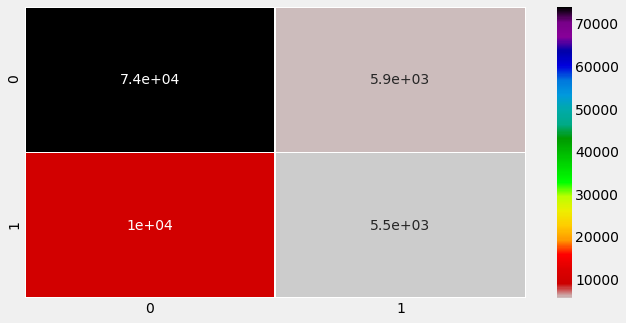

In [59]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot= True, linewidth =1, cmap='nipy_spectral_r')

In [60]:
print("Accuracy for Normal dataset : ",accuracy_score(y_test, y_pred))

Accuracy for Normal dataset :  0.8308858162635154


# For Random Over Sampler Case

In [61]:
cm_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_over)


[[69175 10702]
 [ 1005 78895]]


<AxesSubplot:>

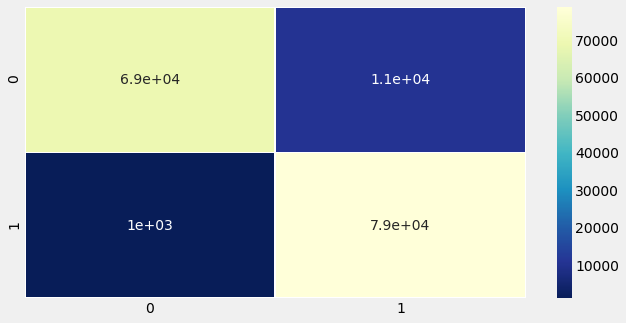

In [62]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_over, annot= True, linewidth =1, cmap='YlGnBu_r')

In [63]:
print("Accuracy for Over Sampled dataset : ",accuracy_score(y_test_over, y_pred_over))

Accuracy for Over Sampled dataset :  0.9267291287231579


# For Random Under Sampler Case

In [64]:
cm_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_under)

[[11987  3655]
 [ 2685 12974]]


<AxesSubplot:>

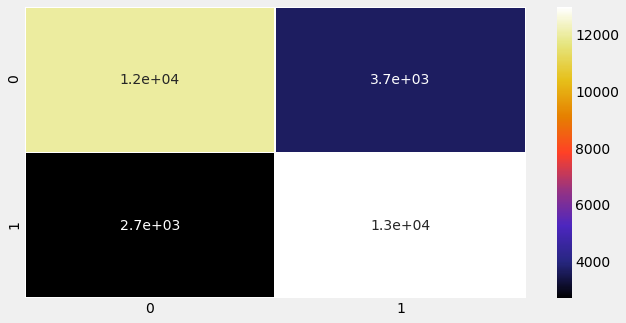

In [65]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_under, annot= True, linewidth =1, cmap='CMRmap')

In [66]:
print("Accuracy for Under Sampled dataset : ",accuracy_score(y_test_under, y_pred_under))

Accuracy for Under Sampled dataset :  0.7974505606849621


# For SMOTE Case

In [67]:
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
print(cm_smote)
accuracy_score(y_test_smote, y_pred_smote)

[[67540 12337]
 [ 9132 70768]]


0.8656314738667017

<AxesSubplot:>

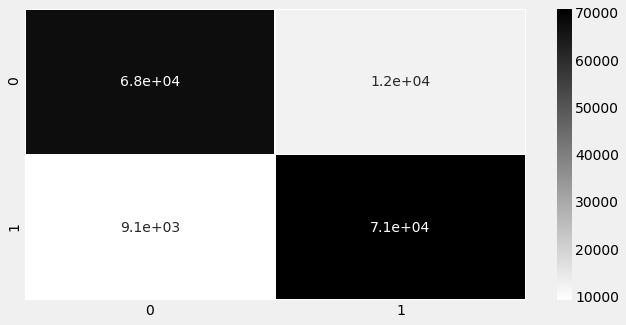

In [68]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_smote, annot= True, linewidth =1, cmap='gist_gray_r')

In [69]:
print("Accuracy for SMOTE dataset : ",accuracy_score(y_test_smote, y_pred_smote))

Accuracy for SMOTE dataset :  0.8656314738667017


# For Both Over and Under Sampling Case 

In [70]:
cm_both = confusion_matrix(y_test_both, y_pred_both)
print(cm_both)

[[30266  1560]
 [ 1470 14637]]


<AxesSubplot:>

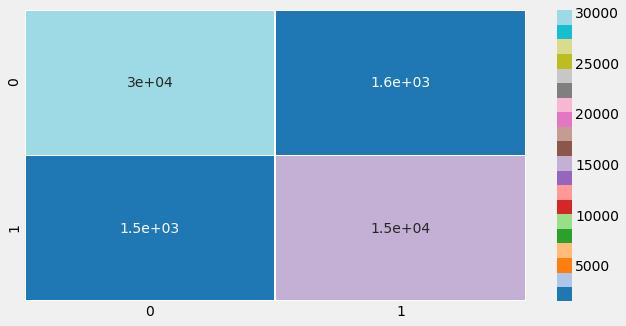

In [71]:
plt.subplots(figsize=(10,5))
sns.heatmap(cm_both, annot= True, linewidth =1, cmap='tab20')

In [72]:
print("Accuracy for Both Over and Under Sampled dataset : ",accuracy_score(y_test_both, y_pred_both))

Accuracy for Both Over and Under Sampled dataset :  0.9367867648592827


# 10 fold Cross Validation for all the Cases

**K fold Crossvalidation itself is used to check data imbalance problem. I am performing this to check which Cases works best for this dataset**

## For Normal Case

In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(score)

[0.64975299 0.64987446 0.65380985 0.65672859 0.6539589  0.65947369
 0.65347296 0.64882008 0.65478435 0.65271057]


## For Random Over Sampler Case

In [74]:
score_over = cross_val_score(rfc_over, X_over, y_over, cv=10, scoring='f1_macro')
print(score_over)

[0.93261589 0.93366988 0.93852446 0.93996547 0.93840114 0.93915823
 0.93953799 0.93697424 0.93864946 0.93876018]


## For Random Under Sampler Case

In [75]:
score_under = cross_val_score(rfc_under, X_under, y_under, cv=10, scoring='f1_macro')
print(score_under)

[0.79971115 0.79773879 0.7992112  0.79848738 0.79581631 0.80562062
 0.79509176 0.79476789 0.794691   0.79807771]


## For SMOTE Case

In [76]:
score_smote = cross_val_score(rfc_smote, X_smote, y_smote, cv=10, scoring='f1_macro')
print(score_smote)

[0.76940048 0.77593001 0.88942537 0.89051752 0.88808886 0.88880074
 0.88893848 0.8867005  0.88932635 0.88766679]


## For Both Oversampling and Undersampling Case

In [77]:
score_both = cross_val_score(rfc_both, X_both, y_both, cv=10, scoring='f1_macro')
print(score_both)

[0.75581821 0.75041475 0.75633929 0.75715622 0.75304751 0.75294673
 0.75620901 0.75747305 0.75531776 0.77382235]


# Saving the Accuracies into a Data frame 

In [78]:
dff = pd.DataFrame()
dff['Normal'] = score
dff['Over Sampling'] = score_over
dff['Under Sampling'] = score_under
dff['SMOTE'] = score_smote
dff['Both Sampling'] = score_both

In [79]:
dff

Normal  Over Sampling  Under Sampling     SMOTE  Both Sampling
0  0.649753       0.932616        0.799711  0.769400       0.755818
1  0.649874       0.933670        0.797739  0.775930       0.750415
2  0.653810       0.938524        0.799211  0.889425       0.756339
3  0.656729       0.939965        0.798487  0.890518       0.757156
4  0.653959       0.938401        0.795816  0.888089       0.753048
5  0.659474       0.939158        0.805621  0.888801       0.752947
6  0.653473       0.939538        0.795092  0.888938       0.756209
7  0.648820       0.936974        0.794768  0.886701       0.757473
8  0.654784       0.938649        0.794691  0.889326       0.755318
9  0.652711       0.938760        0.798078  0.887667       0.773822

# Plotting the Accuracy Chart 

In [80]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=dff['Normal'], name='Normal',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=dff['Over Sampling'], name = 'Over Sampling',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(y=dff['Under Sampling'], name = 'Under Sampling',
                         line=dict(color='orchid', width=3)))
fig.add_trace(go.Scatter(y=dff['SMOTE'], name = 'SMOTE',
                         line=dict(color='forestgreen', width=3)))
fig.add_trace(go.Scatter(y=dff['Both Sampling'], name = 'Both Sampling',
                         line=dict(color='chocolate', width=3)))

In [81]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=dff['Normal'], name='Normal',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=dff['Over Sampling'], name = 'Over Sampling',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(y=dff['Under Sampling'], name = 'Under Sampling',
                         line=dict(color='orchid', width=3)))
fig.add_trace(go.Scatter(y=dff['SMOTE'], name = 'SMOTE',
                         line=dict(color='forestgreen', width=3)))
fig.add_trace(go.Scatter(y=dff['Both Sampling'], name = 'Both Sampling',
                         line=dict(color='chocolate', width=3)))


fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter',
                  yaxis_zeroline=False, xaxis_zeroline=False)

* **For our dataset Random Over Sampler got the highest Accuracy** 
* **After that SMOTE work Best**
* **Then Under Sampling came in the Picture**
* **Both Over and Under Sampling Came in the fourth place**
* **And the least one is normal Data set**

# So, It is proven that data Imbalance is a big issue and by sampling it can be solved.